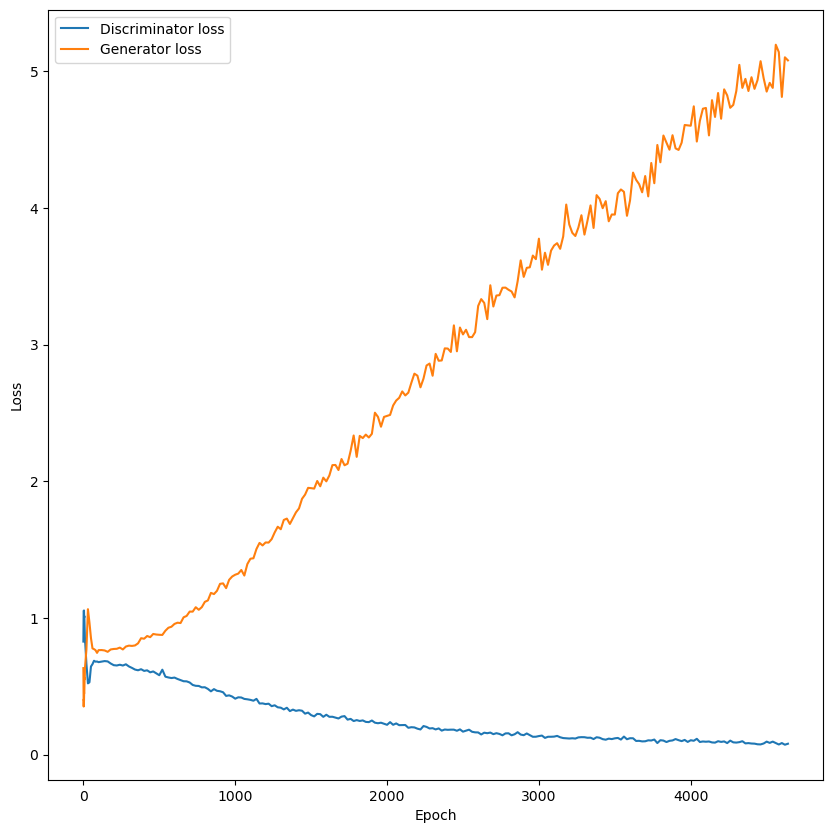

In [36]:
import os
import matplotlib.pyplot as plt


def visualize_losses(sourcepath="models"):
    values = []
    for dir in os.listdir(sourcepath):
        if not dir.startswith("epoch_"):
            continue
        path = os.path.join(sourcepath, dir)
        epoch = int(dir.split("_")[1])

        with open(os.path.join(path, "losses.txt"), "r") as f:
            disc_loss = float(f.readline().split()[0])
            gen_loss = float(f.readline().split()[0])

        values.append((epoch, disc_loss, gen_loss))

    values.sort(key=lambda x: x[0])
    epochs = [x[0] for x in values]
    disc_losses = [x[1] for x in values]
    gen_losses = [x[2] for x in values]

    fix, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.plot(epochs, disc_losses, label="Discriminator loss")
    ax.plot(epochs, gen_losses, label="Generator loss")
    ax.legend()
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    plt.savefig("losses.png")
    plt.show()


visualize_losses(sourcepath="models_4")

True